In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('new_data.csv')
df = pd.DataFrame(data)

years_to_retire   location  salary  investment_amount  current_savings  \
0                   33    Lucknow  183246                  0           119928   
1                   19    Kolkata   29717                  0           108246   
2                   12    Chennai  159948              18725          1339139   
3                   25       Pune  176368              17375           664623   
4                   23  Bangalore  480555              35500          1463199   
...                ...        ...     ...                ...              ...   
49995               16      Delhi  154592              21992          1391306   
49996               22    Lucknow  324110              55595          1689806   
49997               38  Hyderabad  414081              58017             6019   
49998                7      Delhi  137956              12257           490652   
49999                9     Mumbai  408199              26750          2425761   

         debt  other_expenses  number_of_dependents  current_invested_amount  \
0      159214          134129                     4                        0   
1       73254           37478                     3                    27235   
2           0          114612                     2                   691978   
3       27724           99438                     3                   324632   
4           0          199024                     3                   733991   
...       ...             ...                   ...                      ...   
49995       0          100070                     0                   757185   
49996       0          171171                     4                  1063342   
49997  134015          202310                     4                        0   
49998       0          120872                     4                   240204   
49999       0          239581                     4                  1912403   

      house_ownership  ...  s3_mid  s4_mid  s5_mid  s6_mid  s1_high  s2_high  \
0                Rent  ...      15      22      18      32       29       29   
1                Rent  ...      11      21      24      32       23       33   
2           Own House  ...      11      23      17      29       28       30   
3           Own House  ...      17      29      25      35       31       27   
4           Own House  ...      18      26      24      39       32       31   
...               ...  ...     ...     ...     ...     ...      ...      ...   
49995             EMI  ...      15      27      19      27       32       31   
49996            Rent  ...      11      29      18      32       19       39   
49997       Own House  ...      14      24      21      36        4       37   
49998             EMI  ...      18      24      25      29       33       28   
49999       Own House  ...      19      31      22      28       16       32   

       s3_high  s4_high  s5_high  s6_high  
0            9        8        3       22  
1            8       10        5       21  
2            7        6        4       25  
3            7        6        3       26  
4           11        8        1       17  
...        ...      ...      ...      ...  
49995       10        5        2       20  
49996        9        9        4       20  
49997        9       10       17       23  
49998        8        7        6       18  
49999        8        6       13       25  

[50000 rows x 28 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   years_to_retire          50000 non-null  int64 
 1   location                 50000 non-null  object
 2   salary                   50000 non-null  int64 
 3   investment_amount        50000 non-null  int64 
 4   current_savings          50000 non-null  int64 
 5   debt                     50000 non-null  int64 
 6   other_expenses           50000 non-null  int64 
 7   number_of_dependents     50000 non-null  int64 
 8   current_invested_amount  50000 non-null  int64 
 9   house_ownership          50000 non-null  object
 10  s1_low                   50000 non-null  int64 
 11  s2_low                   50000 non-null  int64 
 12  s3_low                   50000 non-null  int64 
 13  s4_low                   50000 non-null  int64 
 14  s5_low                   50000 non-nul

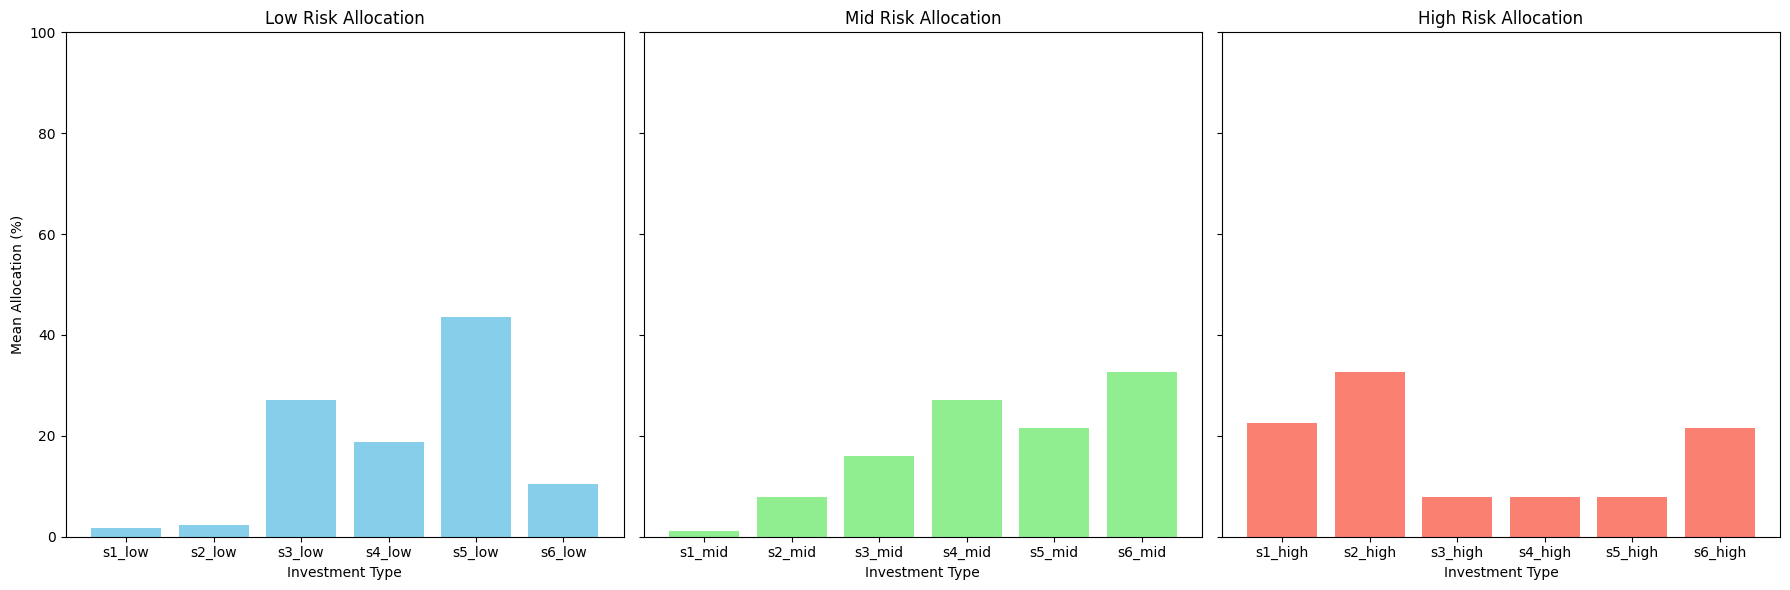

In [13]:
mean_allocation_low = df[['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']].mean()
mean_allocation_mid = df[['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']].mean()
mean_allocation_high = df[['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']].mean()

# mean_low = df['goal_low'].mean()
# mean_mid = df['goal_mid'].mean()
# mean_high = df['goal_high'].mean()

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

ax[0].bar(mean_allocation_low.index, mean_allocation_low.values, color='skyblue')
ax[0].set_title('Low Risk Allocation')
ax[0].set_xlabel('Investment Type')
ax[0].set_ylabel('Mean Allocation (%)')
ax[0].set_ylim(0, 100)

ax[1].bar(mean_allocation_mid.index, mean_allocation_mid.values, color='lightgreen')
ax[1].set_title('Mid Risk Allocation')
ax[1].set_xlabel('Investment Type')
ax[1].set_ylim(0, 100)

ax[2].bar(mean_allocation_high.index, mean_allocation_high.values, color='salmon')
ax[2].set_title('High Risk Allocation')
ax[2].set_xlabel('Investment Type')
ax[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 6))
# goal_labels = ['Low Risk Goal', 'Mid Risk Goal', 'High Risk Goal']
# goal_values = [mean_low, mean_mid, mean_high]
# plt.bar(goal_labels, goal_values, color=['skyblue', 'lightgreen', 'salmon'])
# plt.title('Mean Goal Values for Different Risk Levels')
# plt.xlabel('Risk Level')
# plt.ylabel('Mean Goal Value (INR)')
# plt.show()

In [10]:
df['s1_high'].std()

7.463657775336952

In [9]:
s1_h_max = df['s1_high'].max()
s1_h_min = df['s1_high'].min()

print(f"Max: {s1_h_max}\nMin:{s1_h_min}")

Max: 48
Min:0


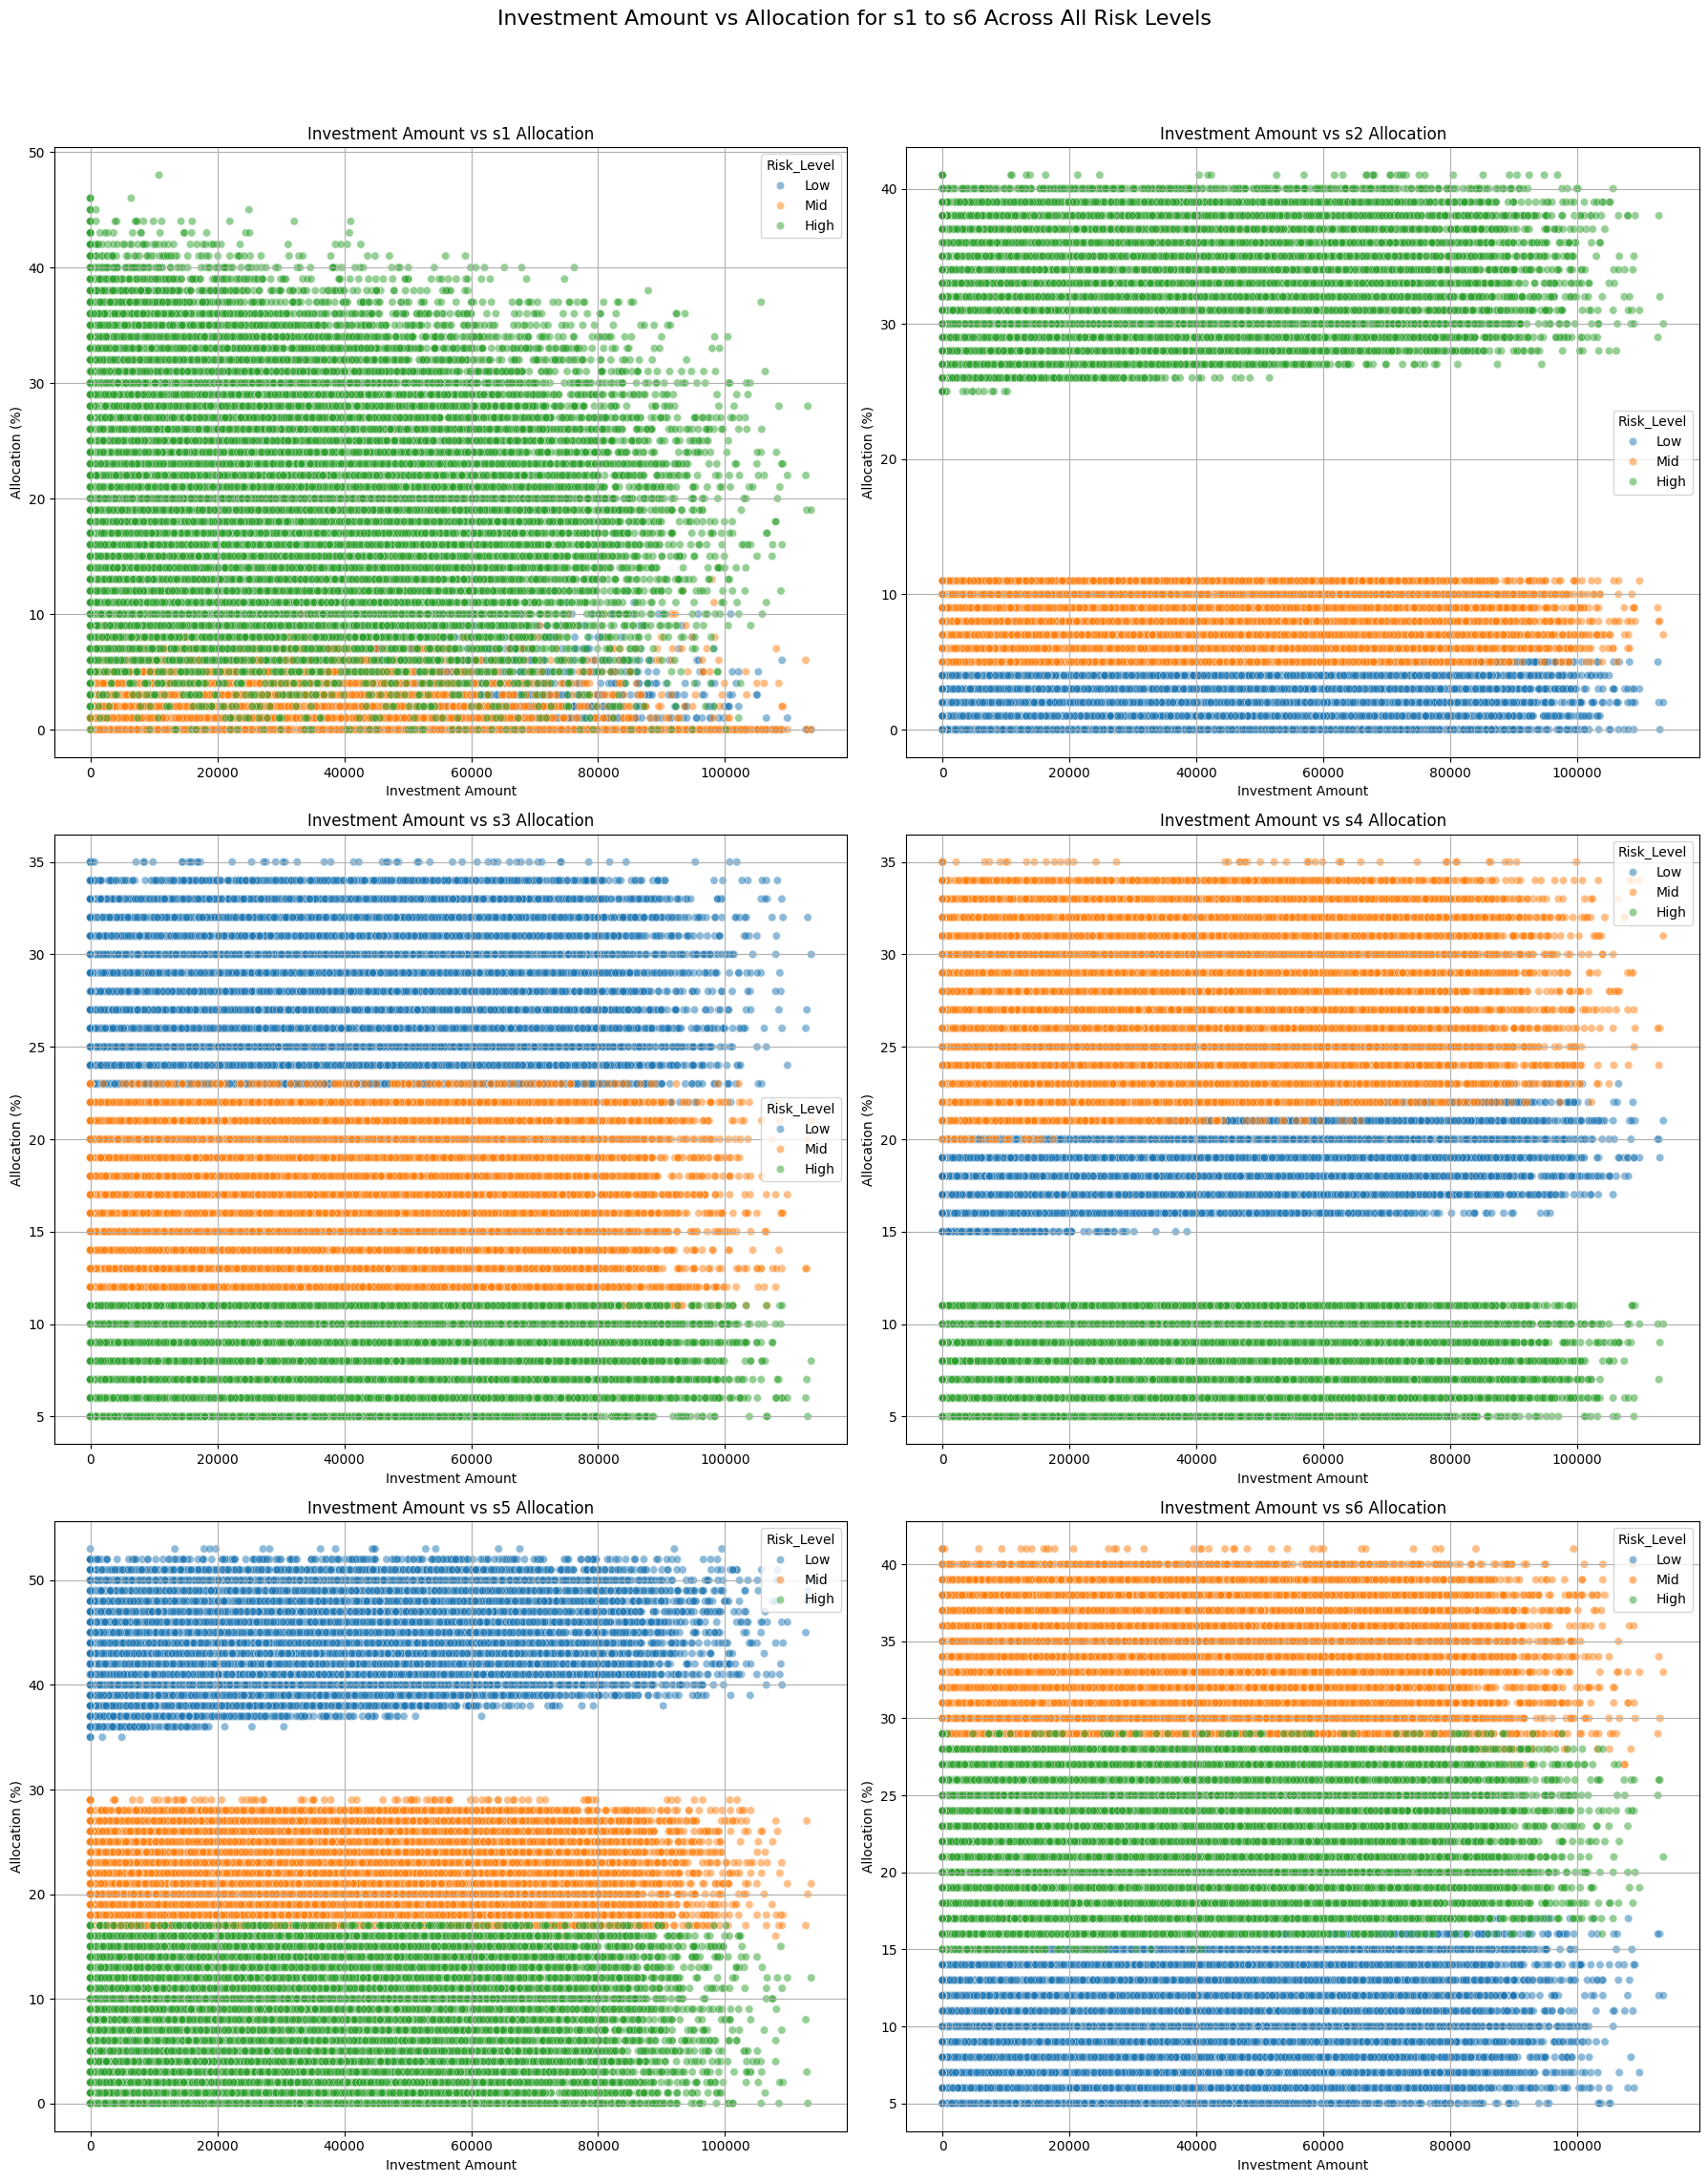

In [11]:
# Reshape the DataFrame for better visualization
data_melted = pd.melt(
    df,
    id_vars=['investment_amount'],
    value_vars=['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low', 
                's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid', 
                's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high'],
    var_name='Investment_Type',
    value_name='Allocation'
)

# Create a new column to classify risk level
def get_risk_level(investment_type):
    if 'low' in investment_type:
        return 'Low'
    elif 'mid' in investment_type:
        return 'Mid'
    elif 'high' in investment_type:
        return 'High'

data_melted['Risk_Level'] = data_melted['Investment_Type'].apply(get_risk_level)

# Create a new column to classify investment asset
data_melted['Investment_Asset'] = data_melted['Investment_Type'].str.extract(r'(s[1-6])')[0]

# Plotting
investment_assets = ['s1', 's2', 's3', 's4', 's5', 's6']
fig, axs = plt.subplots(3, 2, figsize=(18, 24))
fig.suptitle('Investment Amount vs Allocation for s1 to s6 Across All Risk Levels', fontsize=16)

for i, asset in enumerate(investment_assets):
    row, col = divmod(i, 2)
    sns.scatterplot(
        ax=axs[row, col],
        x='investment_amount',
        y='Allocation',
        hue='Risk_Level',
        data=data_melted[data_melted['Investment_Asset'] == asset],
        alpha=0.5
    )
    axs[row, col].set_title(f'Investment Amount vs {asset} Allocation')
    axs[row, col].set_xlabel('Investment Amount')
    axs[row, col].set_ylabel('Allocation (%)')
    axs[row, col].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
data_2 = pd.read_csv('commerce_logic.csv')
df2 = pd.DataFrame(data_2)
df2

years_to_retire  salary  investment_amount  current_savings    debt  \
0                   33  183246               9249            55849  159214   
1                   19   29717                  0            55571   73254   
2                   12  159948              18725          1299139       0   
3                   25  176368              19593           607396   27724   
4                   23  480555              35500          1403199       0   
...                ...     ...                ...              ...     ...   
49995               16  154592              21992          1391306       0   
49996               22  324110              55595          1609806       0   
49997               38  414081              68738                0  134015   
49998                7  137956              12257           410652       0   
49999                9  408199              26750          2345761       0   

       other_expenses  number_of_dependents  current_invested_amount  \
0               70444                     4                        0   
1                8176                     3                        0   
2              114612                     2                   670114   
3               88348                     3                   291514   
4              199024                     3                   701433   
...               ...                   ...                      ...   
49995          100070                     0                   757185   
49996          171171                     4                  1009213   
49997          148704                     4                        0   
49998          120872                     4                   187995   
49999          239581                     4                  1846695   

      house_ownership  s1_low  ...  s3_mid  s4_mid  s5_mid  s6_mid  s1_high  \
0                Rent       9  ...      14      20      17      30       36   
1                Rent      10  ...      10      20      23      31       27   
2           Own House       5  ...      10      22      16      27       32   
3           Own House      14  ...      15      26      23      32       36   
4           Own House       4  ...      15      22      20      33       41   
...               ...     ...  ...     ...     ...     ...     ...      ...   
49995             EMI      16  ...      14      25      18      25       36   
49996            Rent      12  ...      10      26      16      29       28   
49997       Own House       5  ...      12      21      18      31       18   
49998             EMI      12  ...      17      22      24      28       35   
49999       Own House       4  ...      18      28      20      25       24   

       s2_high  s3_high  s4_high  s5_high  s6_high  
0           26        8        7        3       20  
1           32        7        9        5       20  
2           28        6        6        4       24  
3           25        6        6        3       24  
4           27        9        7        1       15  
...        ...      ...      ...      ...      ...  
49995       29        9        5        2       19  
49996       34        8        8        4       18  
49997       32        8        9       14       19  
49998       27        8        7        6       17  
49999       29        8        5       11       23  

[50000 rows x 27 columns]

In [15]:
df2_max = df2['s1_high'].max()
df2_min = df2['s1_high'].min()

std_df2 = df2['s1_high'].std()

print(f"Max: {df2_max}\nMin: {df2_min}\nStandard Deviation: {std_df2}")

Max: 50
Min: 10
Standard Deviation: 6.219927973062052


# <strong style="color: yellow">Model Building</strong>

In [177]:
data = pd.read_csv('real_madrid.csv')
df = pd.DataFrame(data)
df

years_to_retire   location    salary  investment_amount  \
0                   33    Lucknow  183246.0                0.0   
1                   19    Kolkata   29717.0                0.0   
2                   12    Chennai  159948.0            18725.0   
3                   25       Pune  176368.0            17375.0   
4                   23  Bangalore  480555.0            35500.0   
...                ...        ...       ...                ...   
49995               16      Delhi  154592.0            21992.0   
49996               22    Lucknow  324110.0            55595.0   
49997               38  Hyderabad  414081.0            58017.0   
49998                7      Delhi  137956.0            12257.0   
49999                9     Mumbai  408199.0            26750.0   

       current_savings           debt  other_expenses  number_of_dependents  \
0         1.199280e+05  159214.000000   134129.000000                     4   
1         1.082460e+05  167850.089575    37478.000000                     3   
2         1.339139e+06       0.000000   114612.000000                     2   
3         6.646230e+05   27724.000000    99438.000000                     3   
4         1.463199e+06       0.000000   199024.000000                     3   
...                ...            ...             ...                   ...   
49995     1.391306e+06       0.000000   100070.000000                     0   
49996     3.459572e+06       0.000000   171171.000000                     4   
49997     6.019000e+03  134015.000000   202310.000000                     4   
49998     4.906520e+05       0.000000   340969.010432                     4   
49999     2.425761e+06       0.000000   239581.000000                     4   

       current_invested_amount house_ownership  ...  s3_mid  s4_mid  s5_mid  \
0                          0.0            Rent  ...      18      20      22   
1                      27235.0            Rent  ...      12      20      46   
2                     691978.0       Own House  ...      12      25      15   
3                     324632.0       Own House  ...      19      45      50   
4                     733991.0       Own House  ...      20      30      40   
...                        ...             ...  ...     ...     ...     ...   
49995                 757185.0             EMI  ...      17      37      25   
49996                1063342.0            Rent  ...      13      43      21   
49997                      0.0       Own House  ...      17      26      30   
49998                 240204.0             EMI  ...      19      26      46   
49999                1912403.0       Own House  ...      21      48      34   

       s6_mid  s1_high  s2_high  s3_high  s4_high  s5_high  s6_high  
0          32       22       28       12       10        4       24  
1          31        0       47        9       17        6       21  
2          23       28       32        6        3        4       27  
3          39       35       20        6        5        4       30  
4          43       26       30       19       10        1       14  
...       ...      ...      ...      ...      ...      ...      ...  
49995      19       26       35       17        1        2       19  
49996      30        0       63       12       12        5       19  
49997      40        0       58       14       18       20       24  
49998      24       37       25       10        7        6       15  
49999      18       14       35       10        2       13       26  

[50000 rows x 28 columns]

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   years_to_retire          50000 non-null  int64  
 1   location                 50000 non-null  object 
 2   salary                   50000 non-null  float64
 3   investment_amount        50000 non-null  float64
 4   current_savings          50000 non-null  float64
 5   debt                     50000 non-null  float64
 6   other_expenses           50000 non-null  float64
 7   number_of_dependents     50000 non-null  int64  
 8   current_invested_amount  50000 non-null  float64
 9   house_ownership          50000 non-null  object 
 10  s1_low                   50000 non-null  int64  
 11  s2_low                   50000 non-null  int64  
 12  s3_low                   50000 non-null  int64  
 13  s4_low                   50000 non-null  int64  
 14  s5_low                

In [179]:
df = df[df['investment_amount'] != 0]

In [180]:
df = df[df['years_to_retire'] != 0]

In [181]:
df

years_to_retire   location    salary  investment_amount  \
2                   12    Chennai  159948.0       18725.000000   
3                   25       Pune  176368.0       17375.000000   
4                   23  Bangalore  480555.0       35500.000000   
6                   15  Hyderabad  294754.0       40682.771633   
7                   15     Mumbai  190901.0        9641.000000   
...                ...        ...       ...                ...   
49995               16      Delhi  154592.0       21992.000000   
49996               22    Lucknow  324110.0       55595.000000   
49997               38  Hyderabad  414081.0       58017.000000   
49998                7      Delhi  137956.0       12257.000000   
49999                9     Mumbai  408199.0       26750.000000   

       current_savings      debt  other_expenses  number_of_dependents  \
2         1.339139e+06       0.0   114612.000000                     2   
3         6.646230e+05   27724.0    99438.000000                     3   
4         1.463199e+06       0.0   199024.000000                     3   
6         2.281321e+06       0.0   112682.000000                     2   
7         1.236218e+06       0.0   131112.000000                     3   
...                ...       ...             ...                   ...   
49995     1.391306e+06       0.0   100070.000000                     0   
49996     3.459572e+06       0.0   171171.000000                     4   
49997     6.019000e+03  134015.0   202310.000000                     4   
49998     4.906520e+05       0.0   340969.010432                     4   
49999     2.425761e+06       0.0   239581.000000                     4   

       current_invested_amount house_ownership  ...  s3_mid  s4_mid  s5_mid  \
2                     691978.0       Own House  ...      12      25      15   
3                     324632.0       Own House  ...      19      45      50   
4                     733991.0       Own House  ...      20      30      40   
6                    1397582.0       Own House  ...      15      41      37   
7                    1000458.0       Own House  ...      12      35      14   
...                        ...             ...  ...     ...     ...     ...   
49995                 757185.0             EMI  ...      17      37      25   
49996                1063342.0            Rent  ...      13      43      21   
49997                      0.0       Own House  ...      17      26      30   
49998                 240204.0             EMI  ...      19      26      46   
49999                1912403.0       Own House  ...      21      48      34   

       s6_mid  s1_high  s2_high  s3_high  s4_high  s5_high  s6_high  
2          23       28       32        6        3        4       27  
3          39       35       20        6        5        4       30  
4          43       26       30       19       10        1       14  
6          21       18       41       14        9        0       18  
7          36       29       23        8        9        4       27  
...       ...      ...      ...      ...      ...      ...      ...  
49995      19       26       35       17        1        2       19  
49996      30        0       63       12       12        5       19  
49997      40        0       58       14       18       20       24  
49998      24       37       25       10        7        6       15  
49999      18       14       35       10        2       13       26  

[37901 rows x 28 columns]

In [182]:
std_df = df[['s1_low', 's1_mid', 's1_high',
             's2_low', 's2_mid', 's2_high',
             's3_low', 's3_mid', 's3_high',
             's4_low', 's4_mid', 's4_high',
             's5_low', 's5_mid', 's5_high',
             's6_low', 's6_mid', 's6_high',]].std()

In [183]:
max_df = df[['s1_low', 's1_mid', 's1_high',
             's2_low', 's2_mid', 's2_high',
             's3_low', 's3_mid', 's3_high',
             's4_low', 's4_mid', 's4_high',
             's5_low', 's5_mid', 's5_high',
             's6_low', 's6_mid', 's6_high',]].max()

In [184]:
min_df = df[['s1_low', 's1_mid', 's1_high',
             's2_low', 's2_mid', 's2_high',
             's3_low', 's3_mid', 's3_high',
             's4_low', 's4_mid', 's4_high',
             's5_low', 's5_mid', 's5_high',
             's6_low', 's6_mid', 's6_high',]].min()

In [185]:
print(f"Min:\n{min_df}\n\nMax:\n{max_df}\n\nStandard Deviation:\n{std_df}")

Min:
s1_low      0
s1_mid      0
s1_high     0
s2_low      0
s2_mid      0
s2_high    16
s3_low     10
s3_mid     10
s3_high     0
s4_low     15
s4_mid     16
s4_high     0
s5_low     26
s5_mid     10
s5_high     0
s6_low      0
s6_mid     16
s6_high    10
dtype: int64

Max:
s1_low     36
s1_mid     39
s1_high    70
s2_low     21
s2_mid     29
s2_high    73
s3_low     66
s3_mid     29
s3_high    21
s4_low     29
s4_mid     65
s4_high    21
s5_low     80
s5_mid     65
s5_high    22
s6_low     36
s6_mid     51
s6_high    36
dtype: int64

Standard Deviation:
s1_low      3.159092
s1_mid      2.630501
s1_high    13.772508
s2_low      5.513488
s2_mid      7.372628
s2_high    13.182961
s3_low     13.092414
s3_mid      3.938801
s3_high     5.527113
s4_low      2.512036
s4_mid     11.311468
s4_high     5.518195
s5_low     11.648836
s5_mid     13.058634
s5_high     5.519458
s6_low      9.242927
s6_mid      7.721945
s6_high     5.776424
dtype: float64


In [186]:
df[['s1_high', 'years_to_retire', 'investment_amount']].head(20)

s1_high  years_to_retire  investment_amount
2        28               12       18725.000000
3        35               25       17375.000000
4        26               23       35500.000000
6        18               15       40682.771633
7        29               15        9641.000000
8        17               28        5716.000000
9        30               28       19211.000000
10       10                7        1973.000000
11        0               26       19818.403969
12       14                6        3942.000000
13       10               28       10376.000000
15       23                6       80775.000000
16       17               25       11046.000000
18        7               16       15128.000000
19       24               26       45392.000000
20        6               29       59278.000000
21       15               31        7927.000000
22        5               32       14285.000000
23       34               20         579.000000
24        0               19       14341.000000

In [187]:
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt', 'other_expenses', 'number_of_dependents', 'current_invested_amount']
targets = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low', 's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid', 's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

In [188]:
corr_matrix = df[features + targets].corr()

In [189]:
corr_with_targets = corr_matrix.loc[features, targets]

In [190]:
corr_with_targets

s1_low    s2_low    s3_low    s4_low    s5_low  \
years_to_retire         -0.180272  0.126253  0.191054  0.636924  0.317404   
salary                  -0.070587  0.047423  0.071007  0.228501  0.112219   
investment_amount       -0.031920  0.022898  0.032090  0.122794  0.062080   
current_savings          0.050709 -0.049099 -0.070784 -0.237754 -0.114847   
debt                    -0.066786  0.049036  0.077665  0.249409  0.127634   
other_expenses          -0.048849  0.030353  0.044712  0.155121  0.075830   
number_of_dependents    -0.001049  0.002742 -0.000508 -0.005813 -0.001227   
current_invested_amount  0.054016 -0.050594 -0.077677 -0.246347 -0.122403   

                           s6_low    s1_mid    s2_mid    s3_mid    s4_mid  \
years_to_retire          0.127894 -0.168188  0.127590  0.340417  0.239550   
salary                   0.039685 -0.061122  0.051280  0.122419  0.089020   
investment_amount        0.025099 -0.031201  0.027626  0.075650  0.053422   
current_savings         -0.054093  0.054871 -0.044555 -0.122881 -0.085136   
debt                     0.051326 -0.061247  0.045053  0.132108  0.088642   
other_expenses           0.035265 -0.043377  0.035055  0.091089  0.054889   
number_of_dependents    -0.007669 -0.005766 -0.003780 -0.006396 -0.001845   
current_invested_amount -0.050806  0.060636 -0.045341 -0.125429 -0.090584   

                           s5_mid    s6_mid   s1_high   s2_high   s3_high  \
years_to_retire          0.192163  0.298322 -0.324605  0.228402  0.124976   
salary                   0.069365  0.112918 -0.121538  0.085509  0.044403   
investment_amount        0.030279  0.059716 -0.065021  0.046492  0.025117   
current_savings         -0.072887 -0.105917  0.099325 -0.074815 -0.044700   
debt                     0.077930  0.112172 -0.124828  0.087810  0.047813   
other_expenses           0.047105  0.073300 -0.076489  0.044901  0.030358   
number_of_dependents    -0.000822  0.003876 -0.004340 -0.005161  0.004756   
current_invested_amount -0.077641 -0.112530  0.104056 -0.079037 -0.044519   

                          s4_high   s5_high   s6_high  
years_to_retire          0.126595  0.126736  0.282241  
salary                   0.044789  0.053747  0.105287  
investment_amount        0.023335  0.034968  0.054534  
current_savings         -0.046065 -0.039430 -0.098762  
debt                     0.052281  0.050770  0.113705  
other_expenses           0.035044  0.033758  0.077198  
number_of_dependents     0.005589  0.003320  0.002320  
current_invested_amount -0.044462 -0.044904 -0.100401

In [191]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Prepare the data
X = df[features]
y = df[targets]

# Initialize the model
model = RandomForestRegressor(n_estimators=180, random_state=120)

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)


Feature Importances:
                   Feature  Importance
1                   salary    0.165240
2        investment_amount    0.162960
5           other_expenses    0.161409
3          current_savings    0.149396
7  current_invested_amount    0.146401
0          years_to_retire    0.115083
6     number_of_dependents    0.060589
4                     debt    0.038920


Feature Importances:
                   Feature  Importance
3          current_savings    0.376168
0          years_to_retire    0.178000
1                   salary    0.159622
4                     debt    0.121532
5           other_expenses    0.099671
2        investment_amount    0.059796
7  current_invested_amount    0.003371
6     number_of_dependents    0.001840

In [192]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Initialize the model
reg_model = LinearRegression()

# Fit the model for each target variable
coefficients = {}
for target in targets:
    reg_model.fit(X, df[target])
    coefficients[target] = reg_model.coef_

# Convert coefficients to DataFrame for better readability
coefficients_df = pd.DataFrame(coefficients, index=features)

# Display coefficients
print("Regression Coefficients:")
coefficients_df


Regression Coefficients:


s1_low        s2_low        s3_low  \
years_to_retire         -7.413147e-02  8.128864e-02  2.887256e-01   
salary                  -3.662852e-07  6.540916e-07  2.421309e-06   
investment_amount        1.343117e-07  7.531729e-07  1.614319e-06   
current_savings         -4.349627e-08  4.767868e-09  1.677204e-07   
debt                     3.055513e-06 -3.322114e-06 -1.036574e-05   
other_expenses          -2.274889e-07  2.602469e-07  9.407368e-07   
number_of_dependents    -9.123301e-03  1.697091e-02  6.567638e-03   
current_invested_amount -6.240231e-08  2.027552e-08 -1.274408e-07   

                               s4_low        s5_low        s6_low  \
years_to_retire          1.894051e-01  4.376946e-01  1.358524e-01   
salary                   1.165772e-06  2.521748e-06  3.915352e-07   
investment_amount        2.465251e-06  6.371965e-06  2.737926e-06   
current_savings          3.368239e-08  1.784245e-07 -9.306077e-08   
debt                    -7.352468e-06 -1.589880e-05 -4.852700e-06   
other_expenses           7.667307e-07  1.625278e-06  1.337149e-06   
number_of_dependents     3.635956e-03  2.036852e-02 -4.591966e-02   
current_invested_amount  6.260742e-08  4.218315e-08  1.790646e-07   

                               s1_mid        s2_mid        s3_mid  \
years_to_retire         -5.584977e-02  1.145443e-01  1.598398e-01   
salary                  -2.565249e-07  8.112771e-07  7.661439e-07   
investment_amount       -3.725518e-07  1.441444e-06  3.319195e-06   
current_savings         -3.790384e-08  1.118346e-08  1.705318e-08   
debt                     2.527505e-06 -5.167632e-06 -6.069578e-06   
other_expenses          -1.867260e-07  5.381934e-07  9.291269e-07   
number_of_dependents    -1.663576e-02 -1.114114e-02 -7.849564e-03   
current_invested_amount -4.737139e-09  6.668269e-08  9.103743e-08   

                               s4_mid        s5_mid        s6_mid  \
years_to_retire          3.287085e-01  2.907263e-01  2.782238e-01   
salary                   2.049905e-06  2.179636e-06  1.876804e-06   
investment_amount        6.445843e-06  8.791609e-07  3.386370e-06   
current_savings          1.280486e-07  1.029041e-07  1.027506e-07   
debt                    -1.421896e-05 -1.056626e-05 -1.178690e-05   
other_expenses           5.960717e-07  1.343531e-06  7.985544e-07   
number_of_dependents     2.459578e-02  2.028342e-03  4.696655e-02   
current_invested_amount  4.096676e-08 -2.501728e-08  4.313333e-08   

                              s1_high       s2_high       s3_high  \
years_to_retire         -5.697674e-01  3.753349e-01  8.544364e-02   
salary                  -2.782001e-06  2.435798e-06  3.883845e-07   
investment_amount       -5.031353e-06  4.325008e-06  1.175812e-06   
current_savings         -2.615704e-07  1.757880e-07 -6.315105e-10   
debt                     2.236811e-05 -1.486095e-05 -3.552290e-06   
other_expenses          -6.448798e-07 -4.391351e-07  2.332565e-07   
number_of_dependents    -1.140900e-01  6.914894e-03  2.954429e-02   
current_invested_amount -4.753400e-07  2.008107e-07  8.672637e-08   

                              s4_high       s5_high       s6_high  
years_to_retire          8.384331e-02  8.192864e-02  1.946301e-01  
salary                   3.691154e-07  6.714306e-07  1.127572e-06  
investment_amount        8.384157e-07  2.648521e-06  2.010567e-06  
current_savings         -2.001361e-08  6.833870e-08  2.283281e-08  
debt                    -2.856683e-06 -2.719280e-06 -6.814366e-06  
other_expenses           5.089382e-07  2.315856e-07  1.085251e-06  
number_of_dependents     2.666904e-02  1.678577e-02  1.775120e-02  
current_invested_amount  1.127941e-07 -3.639721e-08  1.434567e-07

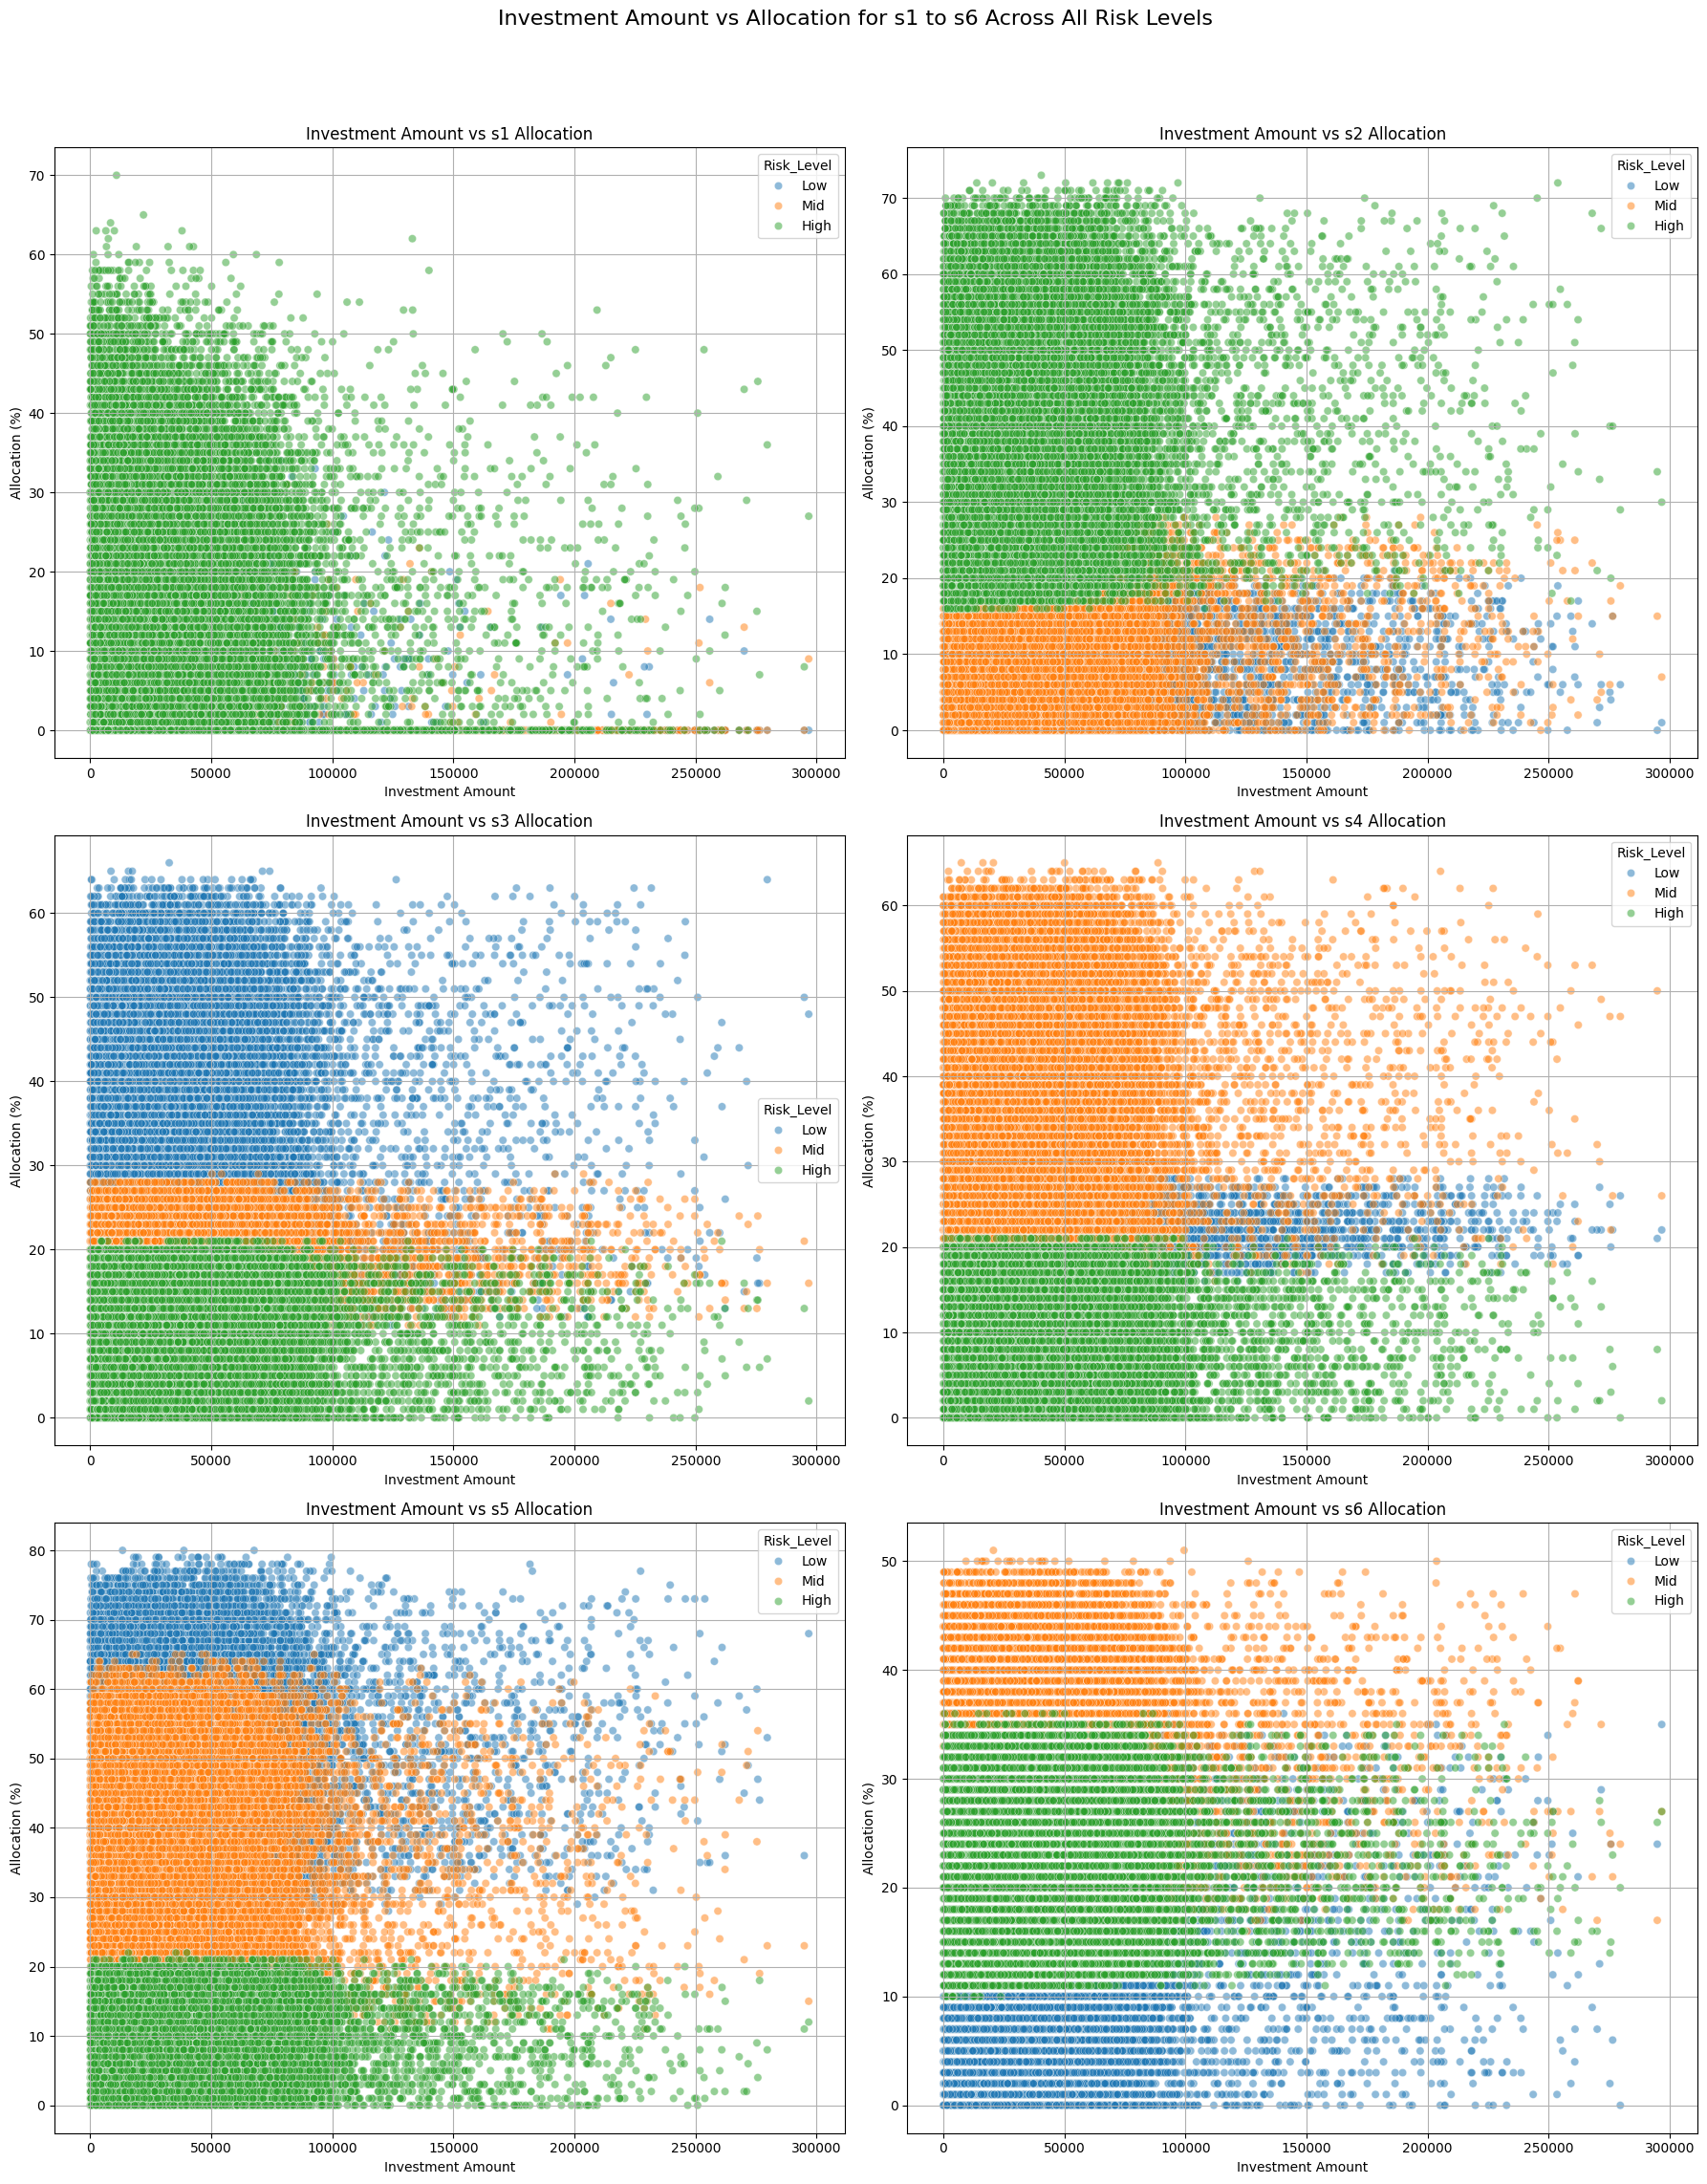

In [193]:
# Reshape the DataFrame for better visualization
data_melted = pd.melt(
    df,
    id_vars=['investment_amount'],
    value_vars=['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low', 
                's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid', 
                's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high'],
    var_name='Investment_Type',
    value_name='Allocation'
)

# Create a new column to classify risk level
def get_risk_level(investment_type):
    if 'low' in investment_type:
        return 'Low'
    elif 'mid' in investment_type:
        return 'Mid'
    elif 'high' in investment_type:
        return 'High'

data_melted['Risk_Level'] = data_melted['Investment_Type'].apply(get_risk_level)

# Create a new column to classify investment asset
data_melted['Investment_Asset'] = data_melted['Investment_Type'].str.extract(r'(s[1-6])')[0]

# Plotting
investment_assets = ['s1', 's2', 's3', 's4', 's5', 's6']
fig, axs = plt.subplots(3, 2, figsize=(18, 24))
fig.suptitle('Investment Amount vs Allocation for s1 to s6 Across All Risk Levels', fontsize=16)

for i, asset in enumerate(investment_assets):
    row, col = divmod(i, 2)
    sns.scatterplot(
        ax=axs[row, col],
        x='investment_amount',
        y='Allocation',
        hue='Risk_Level',
        data=data_melted[data_melted['Investment_Asset'] == asset],
        alpha=0.5
    )
    axs[row, col].set_title(f'Investment Amount vs {asset} Allocation')
    axs[row, col].set_xlabel('Investment Amount')
    axs[row, col].set_ylabel('Allocation (%)')
    axs[row, col].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

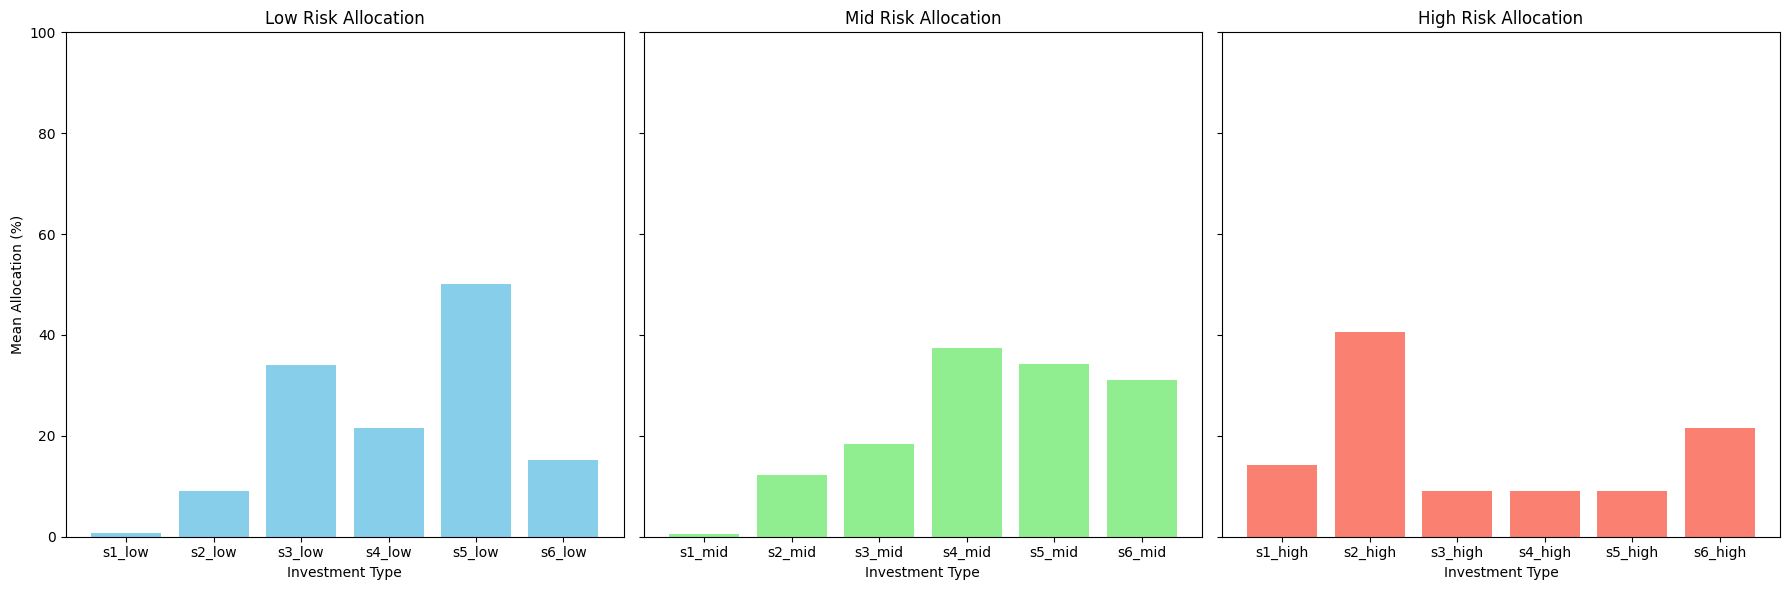

In [194]:
mean_allocation_low = df[['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']].mean()
mean_allocation_mid = df[['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']].mean()
mean_allocation_high = df[['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']].mean()

# mean_low = df['goal_low'].mean()
# mean_mid = df['goal_mid'].mean()
# mean_high = df['goal_high'].mean()

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

ax[0].bar(mean_allocation_low.index, mean_allocation_low.values, color='skyblue')
ax[0].set_title('Low Risk Allocation')
ax[0].set_xlabel('Investment Type')
ax[0].set_ylabel('Mean Allocation (%)')
ax[0].set_ylim(0, 100)

ax[1].bar(mean_allocation_mid.index, mean_allocation_mid.values, color='lightgreen')
ax[1].set_title('Mid Risk Allocation')
ax[1].set_xlabel('Investment Type')
ax[1].set_ylim(0, 100)

ax[2].bar(mean_allocation_high.index, mean_allocation_high.values, color='salmon')
ax[2].set_title('High Risk Allocation')
ax[2].set_xlabel('Investment Type')
ax[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()

## Actual Model Building

In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [196]:
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount']

targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

In [197]:
x = df[features]
y_low = df[targets_low]
y_mid = df[targets_mid]
y_high = df[targets_high]

In [198]:
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_low.div(y_mid.sum(axis=1), axis=0)
y_high = y_low.div(y_high.sum(axis=1), axis=0)

In [199]:
numerical_features = [col for col in features]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

x_processed = preprocessor.fit_transform(x)

In [200]:
x_train, x_test, y_train_low, y_test_low = train_test_split(x_processed, y_low, test_size=0.3, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(x_processed, y_mid, test_size=0.3, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(x_processed, y_high, test_size=0.3, random_state=42)

In [201]:
input_layer = Input(shape=(x_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

In [202]:
low_output = Dense(6, activation='softmax', name="low_output")(x)
mid_output = Dense(6, activation='softmax', name="mid_output")(x)
high_output = Dense(6, activation='softmax', name="high_output")(x)

In [203]:
input_layer

<KerasTensor shape=(None, 8), dtype=float32, sparse=None, name=keras_tensor_14>

In [96]:
x

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_10>

In [97]:
mid_output

<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_12>

In [204]:
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

In [102]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics={'low_output': 'accuracy', 'mid_output': 'accuracy', 'high_output': 'accuracy'})

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(x_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=150, batch_size=150, validation_data=(x_test, [y_test_low, y_test_mid, y_test_high]),
                    callbacks=[early_stopping, reduce_lr])

results = model.evaluate(x_test, [y_test_low, y_test_mid, y_test_high])

print(results)
# total_loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = results
# print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - high_output_accuracy: 0.6494 - loss: 0.0547 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.7399 - val_high_output_accuracy: 1.0000 - val_loss: 0.0547 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 1.0000 - learning_rate: 0.0100
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - high_output_accuracy: 0.9819 - loss: 0.0547 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.9987 - val_high_output_accuracy: 1.0000 - val_loss: 0.0547 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 1.0000 - learning_rate: 0.0100
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - high_output_accuracy: 0.9427 - loss: 0.0547 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.9896 - val_high_output_accuracy: 1.0000 - val_loss: 0.0547 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.7562 - learning_rate: 0.0100
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - high_output_accuracy: 0.

In [103]:
results

[0.05470000579953194, 1.0, 1.0, 1.0]

In [104]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │        576 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ low_output (Dense)  │ (None, 6)         │        198 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mid_output (Dense)  │ (None, 6)         │        198 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ high_output (Dense) │ (None, 6)         │        198 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,752 (38.10 KB)

 Trainable params: 3,250 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,502 (25.40 KB)

In [106]:
low_pred, mid_pred, high_pred = model.predict(x_test)

356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step


In [118]:
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[12, 740000, 140000, 1000000, 0, 50000, 3, 1000000]], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Low Risk:
s1: 11.61%, s2: 3.58%, s3: 22.72%, s4: 15.38%, s5: 35.09%, s6: 11.63%
Medium Risk:
s1: 16.63%, s2: 16.57%, s3: 16.70%, s4: 16.63%, s5: 16.81%, s6: 16.66%
High Risk:
s1: 16.65%, s2: 16.58%, s3: 16.69%, s4: 16.64%, s5: 16.80%, s6: 16.64%


- 'years_to_retire'
- 'salary'
- 'investment_amount'
- 'current_savings'
- 'debt'
- 'other_expenses'
- 'number_of_dependents'
- 'current_invested_amount'

Low Risk:
s1: 12.48%, s2: 4.13%, s3: 24.71%, s4: 16.61%, s5: 29.59%, s6: 12.48%
Medium Risk:
s1: 16.64%, s2: 16.58%, s3: 16.73%, s4: 16.66%, s5: 16.76%, s6: 16.64%
High Risk:
s1: 16.63%, s2: 16.57%, s3: 16.73%, s4: 16.67%, s5: 16.77%, s6: 16.63%


Low Risk:
s1: 12.65%, s2: 4.97%, s3: 19.78%, s4: 15.07%, s5: 34.87%, s6: 12.66%
Medium Risk:
s1: 16.62%, s2: 16.56%, s3: 16.70%, s4: 16.65%, s5: 16.85%, s6: 16.63%
High Risk:
s1: 16.63%, s2: 16.55%, s3: 16.70%, s4: 16.65%, s5: 16.85%, s6: 16.62%


Low Risk:
s1: 12.52%, s2: 4.14%, s3: 24.89%, s4: 16.64%, s5: 29.30%, s6: 12.52%
Medium Risk:
s1: 16.64%, s2: 16.58%, s3: 16.73%, s4: 16.66%, s5: 16.76%, s6: 16.64%
High Risk:
s1: 16.63%, s2: 16.57%, s3: 16.73%, s4: 16.67%, s5: 16.77%, s6: 16.63%

In [111]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Custom scorer to handle multiple outputs
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    loss = 0
    for i in range(len(y)):
        loss += mean_squared_error(y[i], y_pred[i])
    return -loss / len(y)

# Evaluate the baseline performance
y_test_pred = model.predict(x_test)
baseline_score = custom_scorer(model, x_test, [y_test_low, y_test_mid, y_test_high])

# Calculate permutation feature importance
results = permutation_importance(
    model, x_test, [y_test_low, y_test_mid, y_test_high], 
    n_repeats=10, random_state=42, scoring=custom_scorer
)

# Display results
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Feature Importance:")
print(importance_df)


356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step
356/356 ━━━

In [112]:
importance_df

Feature    Importance
1                   salary  7.523108e-05
0          years_to_retire  5.248015e-05
5           other_expenses  1.455224e-05
2        investment_amount  1.143401e-05
3          current_savings  9.882866e-06
4                     debt  8.282984e-06
7  current_invested_amount  6.958260e-06
6     number_of_dependents  2.124783e-09

## Model 2

In [246]:
df

years_to_retire   location    salary  investment_amount  \
2                   12    Chennai  159948.0       18725.000000   
3                   25       Pune  176368.0       17375.000000   
4                   23  Bangalore  480555.0       35500.000000   
6                   15  Hyderabad  294754.0       40682.771633   
7                   15     Mumbai  190901.0        9641.000000   
...                ...        ...       ...                ...   
49995               16      Delhi  154592.0       21992.000000   
49996               22    Lucknow  324110.0       55595.000000   
49997               38  Hyderabad  414081.0       58017.000000   
49998                7      Delhi  137956.0       12257.000000   
49999                9     Mumbai  408199.0       26750.000000   

       current_savings      debt  other_expenses  number_of_dependents  \
2         1.339139e+06       0.0   114612.000000                     2   
3         6.646230e+05   27724.0    99438.000000                     3   
4         1.463199e+06       0.0   199024.000000                     3   
6         2.281321e+06       0.0   112682.000000                     2   
7         1.236218e+06       0.0   131112.000000                     3   
...                ...       ...             ...                   ...   
49995     1.391306e+06       0.0   100070.000000                     0   
49996     3.459572e+06       0.0   171171.000000                     4   
49997     6.019000e+03  134015.0   202310.000000                     4   
49998     4.906520e+05       0.0   340969.010432                     4   
49999     2.425761e+06       0.0   239581.000000                     4   

       current_invested_amount house_ownership  ...  s3_mid  s4_mid  s5_mid  \
2                     691978.0       Own House  ...      12      25      15   
3                     324632.0       Own House  ...      19      45      50   
4                     733991.0       Own House  ...      20      30      40   
6                    1397582.0       Own House  ...      15      41      37   
7                    1000458.0       Own House  ...      12      35      14   
...                        ...             ...  ...     ...     ...     ...   
49995                 757185.0             EMI  ...      17      37      25   
49996                1063342.0            Rent  ...      13      43      21   
49997                      0.0       Own House  ...      17      26      30   
49998                 240204.0             EMI  ...      19      26      46   
49999                1912403.0       Own House  ...      21      48      34   

       s6_mid  s1_high  s2_high  s3_high  s4_high  s5_high  s6_high  
2          23       28       32        6        3        4       27  
3          39       35       20        6        5        4       30  
4          43       26       30       19       10        1       14  
6          21       18       41       14        9        0       18  
7          36       29       23        8        9        4       27  
...       ...      ...      ...      ...      ...      ...      ...  
49995      19       26       35       17        1        2       19  
49996      30        0       63       12       12        5       19  
49997      40        0       58       14       18       20       24  
49998      24       37       25       10        7        6       15  
49999      18       14       35       10        2       13       26  

[37901 rows x 28 columns]

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37901 entries, 2 to 49999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   years_to_retire          37901 non-null  int64  
 1   location                 37901 non-null  object 
 2   salary                   37901 non-null  float64
 3   investment_amount        37901 non-null  float64
 4   current_savings          37901 non-null  float64
 5   debt                     37901 non-null  float64
 6   other_expenses           37901 non-null  float64
 7   number_of_dependents     37901 non-null  int64  
 8   current_invested_amount  37901 non-null  float64
 9   house_ownership          37901 non-null  object 
 10  s1_low                   37901 non-null  int64  
 11  s2_low                   37901 non-null  int64  
 12  s3_low                   37901 non-null  int64  
 13  s4_low                   37901 non-null  int64  
 14  s5_low                   37

In [227]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [228]:
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount']


In [229]:
x = df[features]
y_low = df[['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']]
y_mid = df[['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']]
y_high = df[['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']]

In [230]:
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

In [231]:
numerical_features = features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

x_processed = preprocessor.fit_transform(x)

In [232]:
x_train, x_test, y_train_low, y_test_low = train_test_split(x_processed, y_low, test_size=0.3, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(x_processed, y_mid, test_size=0.3, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(x_processed, y_high, test_size=0.3, random_state=42)


In [215]:
def build_model(optimizer='adam', activation='relu', dropout_rate='0.2'):
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    
    low_output = Dense(6, activation='softmax', name="low_output")
    mid_output = Dense(6, activation='softmax', name="mid_output")
    high_output = Dense(6, activation='softmax', name="high_output")

    model.add(low_output)
    model.add(mid_output)
    model.add(high_output)

    return model

In [219]:
model = KerasClassifier(model=build_model, verbose=0)

param_grid = {
    'model__units': [32, 64, 128],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'fit__epochs': [50, 100, 150],
    'fit__batch_size': [32, 128, 512]
}

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [220]:
grid_result = grid.fit(x_train, [y_train_low, y_train_mid, y_train_high])

# Best parameters and model evaluation
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

best_model = grid_result.best_estimator_

# Evaluate the best model
results = best_model.score(x_test, [y_test_low, y_test_mid, y_test_high])
print("Best model evaluation results: ", results)

ValueError: Found input variables with inconsistent numbers of samples: [26530, 3]

In [241]:
x_processed_df = pd.DataFrame(x_processed)
x_processed_df

0         1         2         3         4         5         6  \
0     -0.896260 -0.934608 -0.439975 -0.242257 -0.422759 -0.571076  0.114678   
1      0.435518 -0.843682 -0.482450 -0.646817  0.133099 -0.687445  0.827671   
2      0.230629  0.840762  0.087810 -0.167849 -0.422759  0.076275  0.827671   
3     -0.588927 -0.188116  0.250874  0.322842 -0.422759 -0.585877  0.114678   
4     -0.588927 -0.763205 -0.725782 -0.303987 -0.422759 -0.444538  0.827671   
...         ...       ...       ...       ...       ...       ...       ...   
37896 -0.486482 -0.964267 -0.337187 -0.210969 -0.422759 -0.682598 -1.311309   
37897  0.128185 -0.025557  0.720052  1.029531 -0.422759 -0.137328  1.540664   
37898  1.767297  0.472660  0.796254 -1.041833  2.264203  0.101476  1.540664   
37899 -1.408483 -1.056390 -0.643475 -0.751161 -0.422759  1.164845  1.540664   
37900 -1.203594  0.440089 -0.187488  0.409474 -0.422759  0.387305  1.540664   

              7  
0     -0.403975  
1     -0.744024  
2     -0.365084  
3      0.249197  
4     -0.118418  
...         ...  
37896 -0.343613  
37897 -0.060206  
37898 -1.044533  
37899 -0.822179  
37900  0.725762  

[37901 rows x 8 columns]

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37901 entries, 2 to 49999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   years_to_retire          37901 non-null  int64  
 1   location                 37901 non-null  object 
 2   salary                   37901 non-null  float64
 3   investment_amount        37901 non-null  float64
 4   current_savings          37901 non-null  float64
 5   debt                     37901 non-null  float64
 6   other_expenses           37901 non-null  float64
 7   number_of_dependents     37901 non-null  int64  
 8   current_invested_amount  37901 non-null  float64
 9   house_ownership          37901 non-null  object 
 10  s1_low                   37901 non-null  int64  
 11  s2_low                   37901 non-null  int64  
 12  s3_low                   37901 non-null  int64  
 13  s4_low                   37901 non-null  int64  
 14  s5_low                   37

In [254]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df is already defined and contains the necessary data

# Define features and targets
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount']

# Separate features and targets
x = df[features]
y_low = df[['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']]
y_mid = df[['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']]
y_high = df[['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']]

# Normalize target values to ensure they sum to 1
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

# Combine the targets into a single DataFrame
y_combined = pd.concat([y_low, y_mid, y_high], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y_combined, test_size=0.3, random_state=42)

# Preprocess the features
numerical_features = features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

# Build the model using the Functional API with multiple outputs
def build_model(units=64, dropout_rate=0.3, learning_rate=0.001):
    input_layer = Input(shape=(x_train_processed.shape[1],))
    x = Dense(units, activation='relu')(input_layer)
    x = Dropout(dropout_rate)(x)
    x = Dense(units // 2, activation='relu')(x)
    x = Dropout(dropout_rate)(x)

    low_output = Dense(6, activation='softmax', name="low_output")(x)
    mid_output = Dense(6, activation='softmax', name="mid_output")(x)
    high_output = Dense(6, activation='softmax', name="high_output")(x)

    model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Wrap the model with KerasRegressor
def create_keras_regressor(units, dropout_rate, learning_rate):
    return KerasRegressor(model=build_model, units=units, dropout_rate=dropout_rate, learning_rate=learning_rate, epochs=100, batch_size=32, verbose=0)

param_grid = {
    'model__units': [32, 64, 128],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'fit__epochs': [50, 100, 150],
    'fit__batch_size': [32, 64, 128]
}

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create the custom multi-output wrapper
class MultiOutputWrapper(KerasRegressor):
    def fit(self, x, y, **kwargs):
        return super().fit(x, [y[:, :6], y[:, 6:12], y[:, 12:]], **kwargs)
    
    def score(self, x, y, **kwargs):
        return super().score(x, [y[:, :6], y[:, 6:12], y[:, 12:]], **kwargs)

model = MultiOutputWrapper(model=build_model, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fitting the model
grid_result = grid.fit(x_train_processed, y_train.values, callbacks=[early_stopping])

# Best parameters and model evaluation
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(x_test_processed, y_test.values)
print("Test set evaluation score: ", test_score)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


ValueError: 
All the 729 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
729 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/var/folders/0b/tbcb989n38q5j2gz3d4zcx680000gn/T/ipykernel_24475/2535932479.py", line 83, in fit
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 770, in fit
    self._fit(
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 853, in _initialize
    X, y = self._validate_data(X, y, reset=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1733, in _validate_data
    return super()._validate_data(X=X, y=y, reset=reset, y_numeric=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 626, in _validate_data
    X, y = check_X_y(
           ^^^^^^^^^^
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1289, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1299, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "/Users/mihiresh/Mihiresh/Work/TIAA/FutureFund/backend/mihiresh/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    raise ValueError(
ValueError: Found array with dim 3. None expected <= 2.


In [260]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df is already defined and contains the necessary data

# Define features and targets
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount']

# Separate features and targets
x = df[features]
y_low = df[['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']]
y_mid = df[['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']]
y_high = df[['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']]

# Normalize target values to ensure they sum to 1
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

# Combine the targets into a single DataFrame
y_combined = pd.concat([y_low, y_mid, y_high], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y_combined, test_size=0.3, random_state=42)

# Preprocess the features
numerical_features = features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

# Build the model using the Functional API with multiple outputs
def build_model():
    input_layer = Input(shape=(x_train_processed.shape[1],))
    x = Dense(128, activation='relu')(input_layer)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)

    low_output = Dense(6, activation='softmax', name="low_output")(x)
    mid_output = Dense(6, activation='softmax', name="mid_output")(x)
    high_output = Dense(6, activation='softmax', name="high_output")(x)

    model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

    model.compile(optimizer=Adam(learning_rate=0.001),
              loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy', 'accuracy', 'accuracy'])
    
    return model

model = build_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train_processed, 
                    [y_train.values[:, :6], y_train.values[:, 6:12], y_train.values[:, 12:]], 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=64, 
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
evaluation_results = model.evaluate(
    x_test_processed, 
    [y_test.values[:, :6], y_test.values[:, 6:12], y_test.values[:, 12:]]
)


Epoch 1/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - high_output_accuracy: 0.6768 - loss: 4.8876 - low_output_accuracy: 0.6952 - mid_output_accuracy: 0.3625 - val_high_output_accuracy: 0.7704 - val_loss: 4.6494 - val_low_output_accuracy: 0.8019 - val_mid_output_accuracy: 0.4761
Epoch 2/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - high_output_accuracy: 0.7792 - loss: 4.6664 - low_output_accuracy: 0.7986 - mid_output_accuracy: 0.4306 - val_high_output_accuracy: 0.7704 - val_loss: 4.6423 - val_low_output_accuracy: 0.8019 - val_mid_output_accuracy: 0.4761
Epoch 3/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - high_output_accuracy: 0.7821 - loss: 4.6545 - low_output_accuracy: 0.8022 - mid_output_accuracy: 0.4648 - val_high_output_accuracy: 0.7704 - val_loss: 4.6418 - val_low_output_accuracy: 0.8019 - val_mid_output_accuracy: 0.4761
Epoch 4/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - high_output_accuracy: 0.7820 - loss: 4.6481 - low_output_accuracy: 0.8017 - mid_output_accurac

In [263]:
evaluation_results

[4.643641948699951,
 0.7671269178390503,
 0.8037111759185791,
 0.47163838148117065]

In [264]:
# Predict the test set
y_pred_low, y_pred_mid, y_pred_high = model.predict(x_test_processed)

# Combine predictions into a single DataFrame for easier comparison
y_pred_combined = np.concatenate([y_pred_low, y_pred_mid, y_pred_high], axis=1)
y_test_combined = y_test.values


356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


In [265]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each output
mse_low = mean_squared_error(y_test_combined[:, :6], y_pred_combined[:, :6])
mse_mid = mean_squared_error(y_test_combined[:, 6:12], y_pred_combined[:, 6:12])
mse_high = mean_squared_error(y_test_combined[:, 12:], y_pred_combined[:, 12:])

print(f"MSE Low Allocation: {mse_low}")
print(f"MSE Mid Allocation: {mse_mid}")
print(f"MSE High Allocation: {mse_high}")


MSE Low Allocation: 0.0032868001450412857
MSE Mid Allocation: 0.003128125298982232
MSE High Allocation: 0.006785907370858324


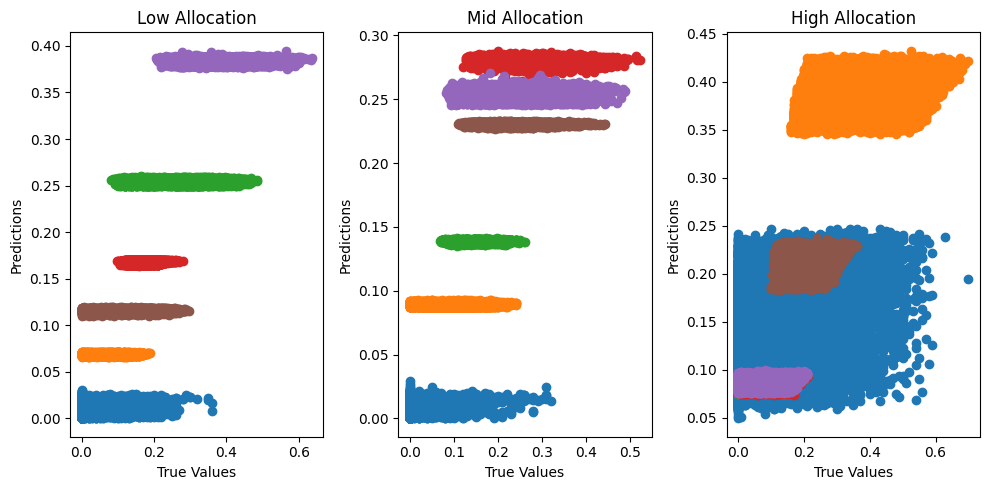

In [266]:
import matplotlib.pyplot as plt

# Plot the results for low allocation
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(y_test_combined[:, :6], y_pred_combined[:, :6], 'o')
plt.title('Low Allocation')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot the results for mid allocation
plt.subplot(1, 3, 2)
plt.plot(y_test_combined[:, 6:12], y_pred_combined[:, 6:12], 'o')
plt.title('Mid Allocation')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot the results for high allocation
plt.subplot(1, 3, 3)
plt.plot(y_test_combined[:, 12:], y_pred_combined[:, 12:], 'o')
plt.title('High Allocation')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()


In [271]:
import pandas as pd

# Example new input data
new_data = {
    'years_to_retire': [10, 20, 14], 
    'salary': [180000, 120000, 150000], 
    'investment_amount': [60000, 30000, 45000], 
    'current_savings': [100000, 150000, 0], 
    'debt': [500000, 0, 200000], 
    'other_expenses': [30000, 40000, 32000], 
    'number_of_dependents': [2, 3, 2], 
    'current_invested_amount': [80000, 100000, 0]
}

# Create DataFrame for new input data
new_df = pd.DataFrame(new_data)

# Standardize the new input data
new_data_processed = preprocessor.transform(new_df)

# Predict the allocations
pred_low, pred_mid, pred_high = model.predict(new_data_processed)

# Combine the predictions into a single DataFrame
pred_combined = np.concatenate([pred_low, pred_mid, pred_high], axis=1)

# Scale predictions to 0-100 and round to 2 decimal places
pred_combined = np.round(pred_combined * 100, 2)

# Create a DataFrame for the predictions
pred_df = pd.DataFrame(pred_combined, columns=[
    's1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low',
    's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid',
    's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high'
])

# Print the predictions
pred_df


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


s1_low  s2_low     s3_low     s4_low     s5_low  s6_low  s1_mid  s2_mid  \
0    3.60    6.89  24.740000  16.500000  37.099998   11.18    2.67    8.72   
1    0.66    6.89  25.440001  16.820000  38.700001   11.50    0.35    8.83   
2    2.84    6.82  24.910000  16.530001  37.680000   11.21    2.02    8.75   

   s3_mid  s4_mid     s5_mid     s6_mid    s1_high    s2_high  s3_high  \
0   13.83   27.50  24.129999  23.139999  21.059999  35.849998     7.97   
1   13.88   28.41  25.480000  23.049999  14.250000  39.009998     8.59   
2   13.90   27.73  24.500000  23.090000  20.530001  36.250000     7.98   

   s4_high  s5_high    s6_high  
0     7.89     8.24  18.990000  
1     8.65     8.61  20.889999  
2     7.93     8.13  19.180000

In [272]:
new_df

years_to_retire  salary  investment_amount  current_savings    debt  \
0               10  180000              60000           100000  500000   
1               20  120000              30000           150000       0   
2               14  150000              45000                0  200000   

   other_expenses  number_of_dependents  current_invested_amount  
0           30000                     2                    80000  
1           40000                     3                   100000  
2           32000                     2                        0

In [273]:
model.save('final_allocation.h5')